Resolución de ejercicio optativo de la clase pasada
===================================================

El ejercicio optativo de la clase anterior puede ser resuelta de la siguiente manera: 

(array([ 1.96702057,  1.19799569]), 1)


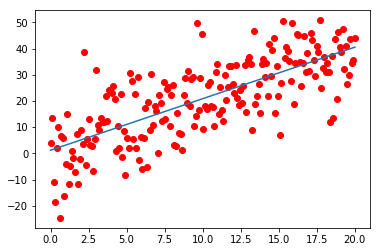

In [8]:
# 1. Simular datos
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Generar datos {t,y}, en donde y=sin(x)*a
t = np.linspace(0,20,200)
m,b=[2,0.5]
yy = m*t+b 
noise = np.random.normal(0,10,200)
y = yy + noise

# 2. Ajustar a datos
from scipy.optimize import leastsq
def residual(params,t,y):
    m,b=params
    model = m*t+b
    return y-model

params=[1,0]
out=leastsq(residual,params,args=(t,y))
print out
m_hat,b_hat=out[0]
fit=m_hat*t+b_hat
plt.plot(t,y,'ro')
plt.plot(t,fit)
plt.show()

In [6]:
print out[0]
print out[0][0]
print out[0][1]
a,b = out[0]
print a
print b

[ 1.99880501  0.51879961]
1.99880501014
0.518799610328
1.99880501014
0.518799610328


Clase 2: Objetivo
==========

Aunque jupyter es una forma conveniente para ejecutar codigo de Python, el código puede ser almacenado en un archivo de texto y ejecutado directamente por Python. Estos programas independientes son comunmente llamados scripts.

Hoy vamos a:

* Escribir scripts
* Buenas práctivas en el uso y mantención de código computacional.
* Guardarlos en Github

Mi primer script
=========

Mantengamos la tradición. Nuestro primer script será un programa que imprimirá en pantalla el mensaje: "hola mundo". Para esto, abré un editor de texto (como Notepad en Windows; Word al ser un procesador de texto no sirve) y escribe el siguiente código:

```python
print "hola mundo"
```

Guarda el archivo con el nombre ```holaMundo.py```, y luego:
1. abre un terminal
2. asegurate de estar en el mismo directorio en donde guardaste `holaMundo.py`, y
3. escribe en el terminal: `python holaMundo.py`

Ejercicio
-----------

El ejemplo anterior fue tan fácil como fue inútil. Haz algo más interesante. Escribe un script llamado 

`ajuste.py` 

en donde se ejecutará el código del ejercicio que vimos al inico de esta clase pero cambiando la última linea por:

`plt.savefig("ajuste.png") # Código autoexplicativo :P`



Buenas prácticas a la hora de escribir código computacional
=================================

Python es simple, fácil, y elegante, pero los programas computacionales no deben ser más simple de lo necesario. Cuando escribas un script es buena práctica usar la siguient estructura:

```python
#Aquí defines las librerias que importaras
import  

#Aquí escribes el código a ejecutar
def miFuncion():
    return 

# Aquí se ejecuta el código
if __name__ == "__main__":
    miFuncion()
```

Bajo esta estructura ocurre lo siguiente:

1. Antes de ejecutar el código, Python define variables especiales. Si este programa se ejecuta como programa principal, la variable `__name__` se le asigna el valor `"__main__"`. Si este programa fuese importado desde otro progama, `__main__` recibe el nombre el archivo de texto (`*.py`) en donde está almacenado.
2. Se ejecuta el comando `import` el cual carga los modulos citados
3. Se evalua el el blocke `def`, creando una función y una variable `miFuncion` que hace referencia a la funcion creada.
4. Ejecuta la sentencia `if`. Si `__name__` es igual a `"__main__"` se ejecuta el blocke contenido en `if`.

En el caso de `holaMundo.py` la estructura seria: 

```python
def miFuncion():
    print "hola mundo"

if __name__ == "__main__":
    miFuncion()
```

Para verificar como cambia el valor de `__main__` modifica `holaMundo.py` de la siguiente manera:


```python
def miFuncion():
    print "hola mundo"

if __name__ == "__main__":
    print "Soy el programa principal. El valor de __name__ es: " + __name__
    miFuncion()
else:
    print "He sido importado. El valor de __name__ es: " + __name__
```

Ejecutando éste código directamente (como programa principal) en el terminal:

```bash
python holaMundo.py
Soy el modulo principal. El valor de __name__ es: __main__
```

O importandolo a una sesión de Python:

```bash
python
>>> import holaMundo
He sido importado. El valor de __name__ es: holaMundo
>>> holaMundo.miFuncion() #Sintaxis para acceder a las funciones del codigo importado
hola mundo
```

¿Por qué complicar el código? 
---------------------------------

A medida que tu código se vuelva más complejo te verás en la necesidad de almacenarlo a lo largo de varios archivos de texto, algunos de estos archivos funcionando como librerias a ser importadas. Este paradigma facilita la corrección del código computacional al reducir un sistema complejo en modulos, cada uno de los cuales puede ser actualizado y/o reparado de manera independiente. Usando esta estructura te permite controlar cuando ejecutar las funciones directamente (como programa principal), y cuando solo dejarlas en memoria (el caso de un código importado).

Ejercicio: Cool stuff, script que requiere variables a ser entregadas por el usuario
-----------------------------------------------------------------------------------

Modifica `ajustar.py` para incorporar el siguiente código:

```python
import argparse

def getParser():
    parser = argparse.ArgumentParser(description='Descripcion de la funcion de este programa.')
    parser.add_argument('-o',type=str,dest="formato",help="'png' si la imagen es guardada en formato PNG,                                                            ,o 'pdf' para ser guradada en formato PDF")

    if len(sys.argv) == 1:
        print >> sys.stderr,parser.print_help()
        exit(0)
    return parser

def main():
    args=getParser().parse_args()
    formato=args.formato
    
    ....
    
    if formato=="png":
        plt.savefig("ajuste.png")
    elif formato=="pdf":
        plt.savefig("ajuste.pdf")
```


Tarea: Almacenar código
----------------

Almacena `ajustar.py` en GitHub. Visita tu cuenta y sigue instrucciones especificas para tu sistema operativo.

El el futuro para actualizar los archivos se debe ejecutar:

```
git status
git add NOMBRE_ARCHIVO
git commit -m "mensaje"
git push -u origin master
```